# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [3]:
%pylab inline
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")

pd.set_option('display.max_columns', None)
df.head()

Populating the interactive namespace from numpy and matplotlib


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


In [7]:
df.shape

(1455, 82)

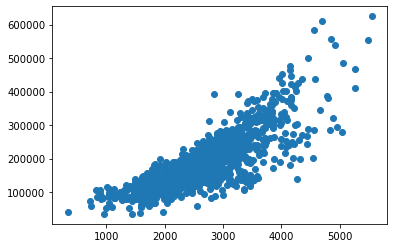

In [8]:
# Data Preparation
# 'TotalSF' as the only feature in this example

X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

plt.scatter(X,y)

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
X.head()

,TotalSF
0,2566
1,2524
2,2706
3,2473
4,3343


In [11]:
type(y)

pandas.core.series.Series

In [12]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# REGRESSION MODELS

## LINEAR REGRESSION

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Creation of a model instance 
reg = LinearRegression()

In [15]:
#Fit the regressor
reg.fit(X,y)

LinearRegression()

In [16]:
#DataFrame with 3 different total surfaces that we want to be predicted
X_pred_1 = pd.DataFrame([  [1000],[1500],[4000]  ])
X_pred_1

,0
0,1000
1,1500
2,4000


In [17]:
#Prediction
reg.predict(X_pred_1)

array([ 50217.33439988,  92112.97793231, 301591.19559442])

In [18]:
type(reg.predict(X_pred_1))

numpy.ndarray

In [19]:
#Coefficient of the linear regression
reg.coef_

array([83.79128706])

In [20]:
#Coefficient of independent term of linear regression
reg.intercept_

-33573.952664961456

In [21]:
#Prediction
y_pred = reg.predict(X)

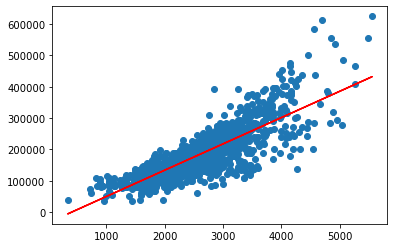

In [22]:
plt.scatter(X,y)
plt.plot(X,y_pred,c="red")

In [23]:
np.corrcoef(X["TotalSF"],y)

array([[1.        , 0.82403696],
       [0.82403696, 1.        ]])

In [24]:
#Spliting test and train sets

In [25]:
#Always the same text
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = reg.predict(X_test)

In [28]:
#MAE metric
from sklearn.metrics import mean_absolute_error

In [29]:
mean_absolute_error(y_test,y_pred) # Primero valor real y luego prediccion

31020.85978003814

## K-NEIGHBORS REGRESSION

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
regk = KNeighborsRegressor(n_neighbors=5)

In [32]:
regk.fit(X_train,y_train)

KNeighborsRegressor()

In [33]:
y_predk = regk.predict(X_test)

In [34]:
# MAE
mean_absolute_error(y_test,y_predk)

32103.24948453609

In [35]:
# RMSE from linear regression

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred))

44268.38992703249

In [36]:
# RMSE: k Nei
np.sqrt(mean_squared_error(y_test,y_predk))

47188.575820499296

### X-VALIDATION

Used for check partitions between train and test sets.

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
#X-val for LINEAR REGRESSION
#cv=5 (by default)

cross_val_score(reg,X,y,scoring="neg_mean_absolute_error")

array([-31590.33866136, -31060.2137948 , -30549.12490917, -29461.90971854,
       -32604.542219  ])

In [39]:
cross_val_score(reg,X,y,scoring="neg_mean_absolute_error").mean()

-31053.225860573923

In [40]:
#X-val for K-NEIGHBORS
cross_val_score(regk,X,y,scoring="neg_mean_absolute_error")

array([-33619.0233677 , -31340.08041237, -30816.02405498, -30915.27491409,
       -33834.96219931])

In [41]:
cross_val_score(regk,X,y,scoring="neg_mean_absolute_error").mean()

-32105.07298969072

### GRID SEARCH

Used for checking different parameters in the regressors

In [42]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [43]:
#K-NEIGHBORS (no possible for linear regression)

reg_gs = GridSearchCV(KNeighborsRegressor(),
                      param_grid={"n_neighbors":np.arange(3,100)},
                      scoring="neg_mean_absolute_error")
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='neg_mean_absolute_error')

In [44]:
reg_gs.best_params_

{'n_neighbors': 82}

In [45]:
regk = KNeighborsRegressor(n_neighbors=82)

In [46]:
cross_val_score(regk,X,y,scoring="neg_mean_absolute_error").mean()

-30197.346752158242

In [47]:
regk.fit(X,y)

KNeighborsRegressor(n_neighbors=82)

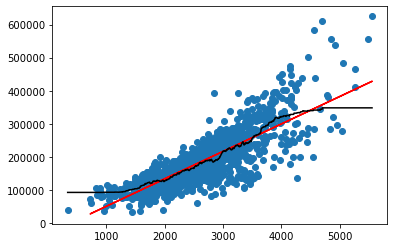

In [48]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,c="red")
area_ficticias = np.linspace(X["TotalSF"].min(),X["TotalSF"].max(),1000)
plt.plot(area_ficticias,regk.predict(pd.DataFrame(area_ficticias)),c="black")

In [49]:
#Librería para ver cuánto tarda un proceso
from tqdm import tqdm_notebook as tqdm

In [50]:
metricas=[]
for k in tqdm(np.arange(10,200)):
  regkt = KNeighborsRegressor(n_neighbors=k)
  res = cross_val_score(regkt,X,y,scoring="neg_mean_absolute_error").mean()
  metricas.append(res)

<ipython-input-50-f64eddcb0b0a>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(np.arange(10,200)):


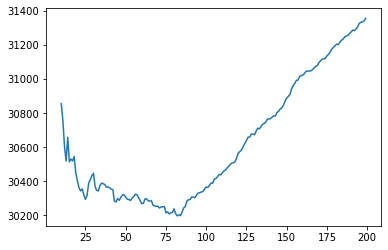

In [51]:
plt.plot(np.arange(10,200),-np.array(metricas),)

# DECISION TREES

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
regd = DecisionTreeRegressor(max_depth=3)

In [55]:
cross_val_score(regd,X,y,scoring="neg_mean_absolute_error").mean()

-30922.044940415257

In [56]:
#GRID for DECISION TREES

reg_gd = GridSearchCV(DecisionTreeRegressor(),
                      param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                      scoring="neg_mean_absolute_error")
reg_gd.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='neg_mean_absolute_error')

In [57]:
import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [58]:
reg_gd.best_params_

{'max_depth': 5, 'min_samples_leaf': 40}

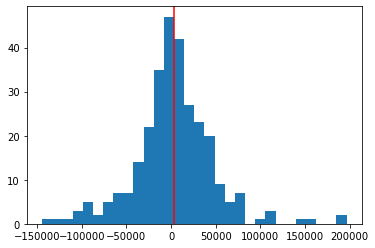

In [59]:
plt.hist(y_test-y_pred,bins=30)
plt.axvline(x=np.mean(y_test-y_pred),c="red")

In [1]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 5.3 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=ee503ef0c1e0d7b0689e60f3486ffe3619fcfb4eb8d5f5d9159be4fceb2d2a10
  Stored in directory: /home/dsc/.cache/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


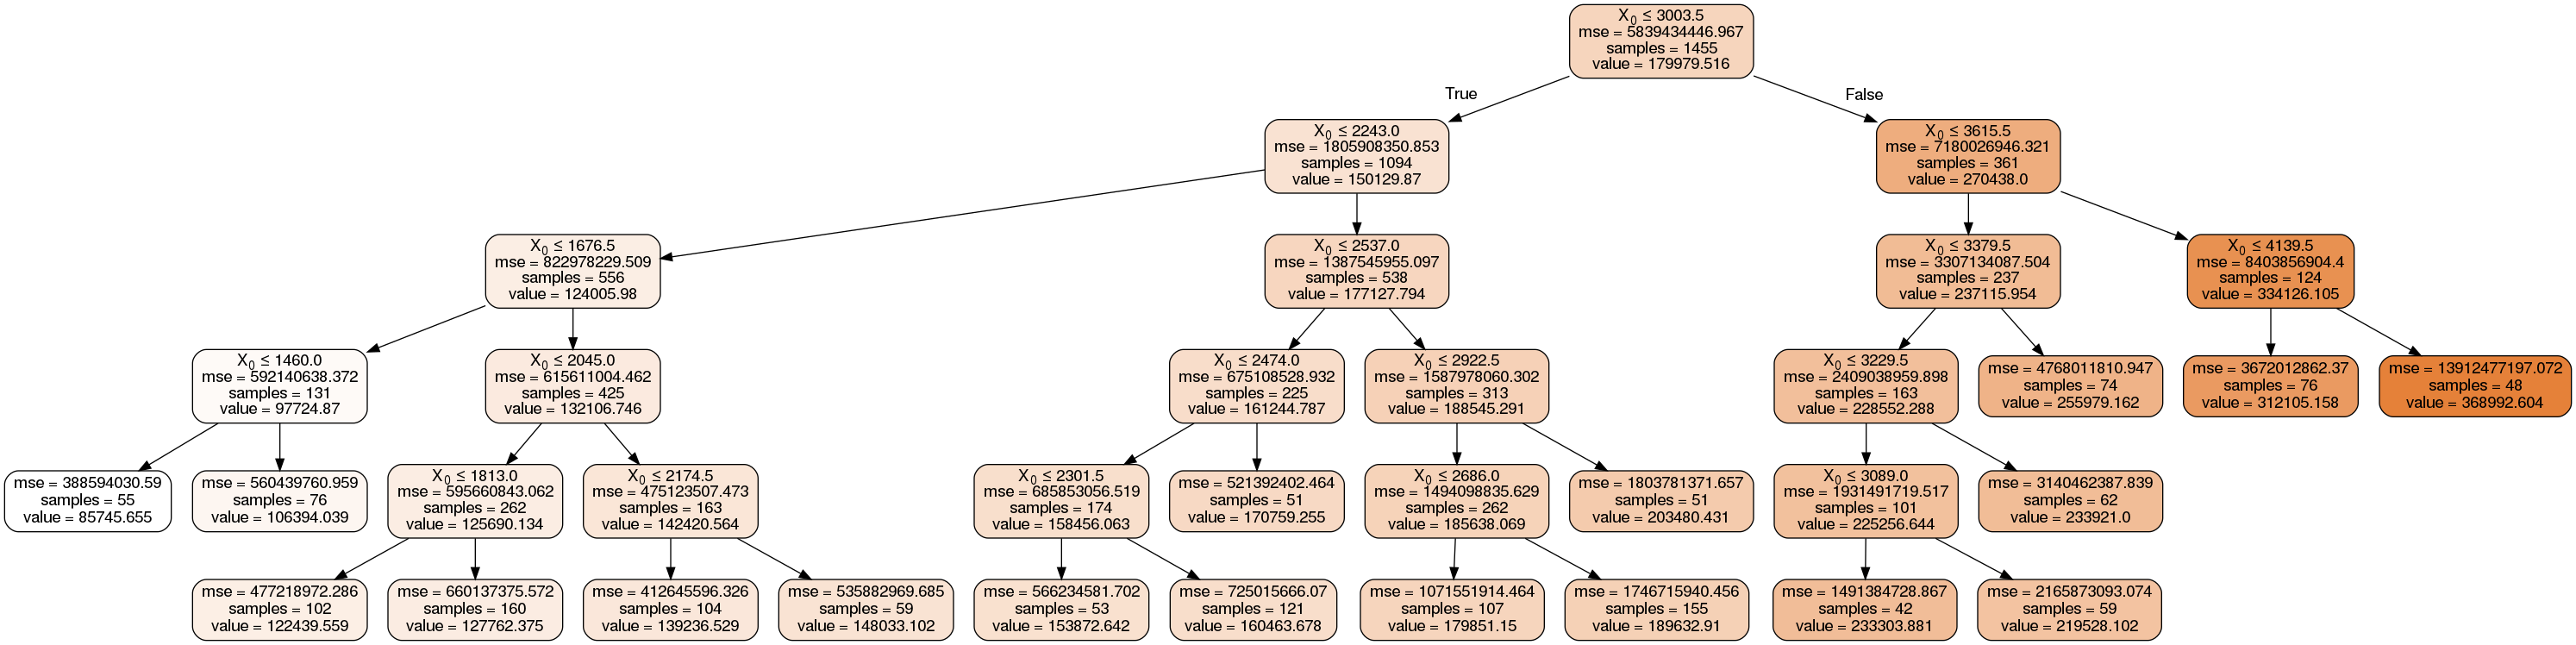

In [69]:
#Display DECISION TREE

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
dot_data = StringIO()
export_graphviz(reg_gd.best_estimator_, out_file=dot_data,filled=True, rounded=True,
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

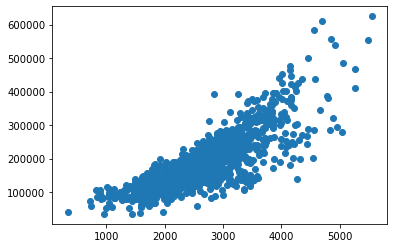

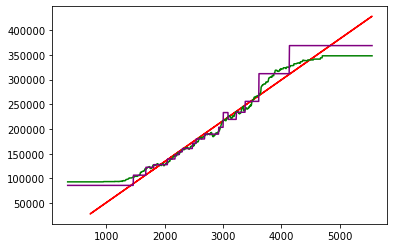

In [61]:
plt.scatter(X,y)

plt.show()
plt.plot(X_test,y_pred,c="red")
area_ficticias = np.linspace(X["TotalSF"].min(),X["TotalSF"].max(),1000)
plt.plot(area_ficticias,regk.predict(pd.DataFrame(area_ficticias)),c="green")
plt.plot(area_ficticias,reg_gd.best_estimator_.predict(pd.DataFrame(area_ficticias)),c="purple")

In [62]:
cross_val_score(reg_gd.best_estimator_,X,y,scoring="neg_mean_absolute_error").mean()

-30334.626243915653

In [63]:
regd1 = DecisionTreeRegressor(max_depth=3)

In [64]:
regd1.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [65]:
pred1 = regd1.predict(X)

In [66]:
restable = X.copy()
restable["y_real"]=y.copy() 
restable["pred1"]=pred1
restable["res1"]=restable["y_real"]-restable["pred1"]
restable.head()

,TotalSF,y_real,pred1,res1
0,2566,208500,188545.290735,19954.709265
1,2524,181500,161244.786667,20255.213333
2,2706,223500,188545.290735,34954.709265
3,2473,140000,161244.786667,-21244.786667
4,3343,250000,228552.288344,21447.711656


In [67]:
regd2 = DecisionTreeRegressor(max_depth=3)
regd2.fit(X,restable["res1"])

DecisionTreeRegressor(max_depth=3)

In [68]:
restable["pred2"]=regd2.predict(X)
restable["combinacion"]=restable["pred1"]+restable["pred2"]
restable["res_comb"]=restable["y_real"]-(restable["combinacion"])
restable.head()

,TotalSF,y_real,pred1,res1,pred2,combinacion,res_comb
0,2566,208500,188545.290735,19954.709265,21.972241,188567.262976,19932.737024
1,2524,181500,161244.786667,20255.213333,21.972241,161266.758908,20233.241092
2,2706,223500,188545.290735,34954.709265,21.972241,188567.262976,34932.737024
3,2473,140000,161244.786667,-21244.786667,21.972241,161266.758908,-21266.758908
4,3343,250000,228552.288344,21447.711656,21.972241,228574.260585,21425.739415
